this notebook is inspired from: https://youtu.be/ytlhMAF6ok0

# Custom instance model training using YOLOv8

In [7]:
# !pip install ultralytics

In [1]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
def show_masks(masks, ax, random_color=False):
    for mask in masks:
        if random_color:
            color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
        else:
                color = np.array([30/255, 144/255, 255/255, 0.6])
        h, w = mask.shape[-2:]
        mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
        ax.imshow(mask_image)

**Import a model and populate it with pre-trained weights.**
<p>
For a list of pre-trained models, checkout: https://docs.ultralytics.com/models/yolov8/#key-features

In [3]:
#Instance
model = YOLO('yolov8x-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8x-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

In case your annotations are on Roboflow, you can directly import the training data using your API key

In [4]:
#!pip install roboflow --quiet

In [5]:
# To hide your API key from others, you can use getpass
#from getpass import getpass
#token = getpass('Enter Token Here') #I stored my token in a file on my Google Drive. I will enter it when prompted here.

Let us load the YAML file that contains the names of our classes, number of classes and the directories for train, valid, and test datasets, respectively.

In [7]:
# define number of classes based on YAML
import yaml
with open("./xmm_om_images_v4-contrast-512-5-7-YOLO/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [8]:
num_classes

'10'

**Train the model**

In [9]:
#Define a project --> Destination directory for all results
project = "yolov8-segm-fine-tuning_x"
#Define subdirectory for this specific training
name = "200_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [12]:
# Train the model
results = model.train(data='./xmm_om_images_v4-contrast-512-5-7-YOLO/data.yaml',
                      project=project,
                      name=name,
                      epochs=200,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=512)
                      # use AutoAugment here

Ultralytics YOLOv8.1.14 🚀 Python-3.11.7 torch-2.1.2+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40337MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=./xmm_om_images_v4-contrast-512-5-7-YOLO/data.yaml, epochs=200, time=None, patience=0, batch=4, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolov8-segm-fine-tuning_x, name=200_epochs-2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: iuliaelisa15. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /workspace/raid/OM_DeepLearning/XMM_OM_code_git/xmm_om_images_v4-contrast-512-5-7-YOLO/train/labels... 289 images, 1 backgrounds

train: WARNING ⚠️ /workspace/raid/OM_DeepLearning/XMM_OM_code_git/xmm_om_images_v4-contrast-512-5-7-YOLO/train/images/S0126700601_B_png.rf.555d9023691fe2d8f47c7f2b80456c30.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /workspace/raid/OM_DeepLearning/XMM_OM_code_git/xmm_om_images_v4-contrast-512-5-7-YOLO/train/images/S0505150401_L_png.rf.17c98ee7d4bed036fdcf51fdbccc4975.jpg: 1 duplicate labels removed
train: New cache created: /workspace/raid/OM_DeepLearning/XMM_OM_code_git/xmm_om_images_v4-contrast-512-5-7-YOLO/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /workspace/raid/OM_DeepLearning/XMM_OM_code_git/xmm_om_images_v4-contrast-512-5-7-YOLO/valid/labels... 86 images, 0 backgrounds, 0

val: WARNING ⚠️ /workspace/raid/OM_DeepLearning/XMM_OM_code_git/xmm_om_images_v4-contrast-512-5-7-YOLO/valid/images/S0870870201_U_png.rf.d45c9f692f6d9a20884ae688dc0e20fb.jpg: 1 duplicate labels removed
val: New cache created: /workspace/raid/OM_DeepLearning/XMM_OM_code_git/xmm_om_images_v4-contrast-512-5-7-YOLO/valid/labels.cache


Plotting labels to yolov8-segm-fine-tuning_x/200_epochs-2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to yolov8-segm-fine-tuning_x/200_epochs-2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      3.92G      1.878      3.124      3.035      1.251         32        512: 100%|██████████| 73/73 [00:13<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.358      0.276      0.247      0.154      0.345      0.259      0.235       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200       4.2G       1.64      2.764      2.027      1.133         11        512: 100%|██████████| 73/73 [00:11<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.31      0.278      0.225      0.137        0.3      0.263       0.21      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.28G      1.734      2.735      2.088      1.168         26        512: 100%|██████████| 73/73 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.103      0.241     0.0972     0.0504      0.115      0.182     0.0795     0.0297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      4.23G      1.704       2.72      1.975      1.152         18        512: 100%|██████████| 73/73 [00:08<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.265      0.321      0.247      0.146      0.258      0.301      0.234      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      4.28G      1.749      2.553      1.799      1.158          2        512: 100%|██████████| 73/73 [00:11<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.394      0.345      0.344      0.191      0.336      0.322      0.317      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      4.25G      1.665        2.5      1.554      1.153         29        512: 100%|██████████| 73/73 [00:09<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.362      0.375      0.341      0.204      0.529      0.308      0.324      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      4.25G      1.663      2.399        1.5      1.145         27        512: 100%|██████████| 73/73 [00:09<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.356      0.418      0.372      0.208      0.337      0.344      0.337      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.23G      1.629      2.458      1.414      1.115          4        512: 100%|██████████| 73/73 [00:09<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.363      0.407      0.366      0.218      0.334      0.329      0.324      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      4.25G      1.608      2.392      1.383      1.114         21        512: 100%|██████████| 73/73 [00:09<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.504      0.384      0.384      0.224      0.507      0.349      0.357      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      4.23G      1.644      2.428      1.454      1.155         11        512: 100%|██████████| 73/73 [00:09<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.599      0.396      0.404      0.243      0.559      0.361      0.357      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      4.23G      1.651      2.419      1.478       1.16          3        512: 100%|██████████| 73/73 [00:09<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.565      0.372      0.397      0.225      0.536      0.318       0.35      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      4.23G      1.709      2.337      1.438      1.149         21        512: 100%|██████████| 73/73 [00:08<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.416      0.436      0.398      0.229      0.459      0.372       0.36      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200       4.2G      1.612      2.348      1.398      1.191          1        512: 100%|██████████| 73/73 [00:08<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.412      0.398      0.407      0.237      0.373       0.37      0.354      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      4.26G       1.52      2.242      1.302      1.071         44        512: 100%|██████████| 73/73 [00:08<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.511      0.408      0.398      0.233      0.696      0.304      0.339      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      4.25G      1.634      2.327       1.34      1.123         30        512: 100%|██████████| 73/73 [00:09<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.601      0.406      0.426      0.252      0.531      0.357      0.367      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      4.24G      1.504      2.201      1.257      1.089         27        512: 100%|██████████| 73/73 [00:09<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.457      0.419      0.421      0.248      0.407      0.369      0.366      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      4.28G      1.548       2.29      1.287      1.086         14        512: 100%|██████████| 73/73 [00:09<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.454      0.415      0.408      0.227      0.407      0.363      0.367      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      4.25G      1.563      2.236      1.291      1.067         30        512: 100%|██████████| 73/73 [00:09<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.34      0.455      0.337      0.203      0.329      0.392      0.297      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      4.24G      1.516      2.226      1.286      1.073         22        512: 100%|██████████| 73/73 [00:11<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.426      0.449      0.413      0.233      0.371      0.408      0.369      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      4.23G      1.512       2.17      1.229      1.082          8        512: 100%|██████████| 73/73 [00:09<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.417      0.459      0.414      0.235      0.361      0.396      0.341      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      4.25G      1.436      2.038      1.189      1.037         46        512: 100%|██████████| 73/73 [00:09<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.443      0.468      0.441      0.253       0.36      0.412      0.374      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      4.25G      1.463      2.075      1.206      1.075         16        512: 100%|██████████| 73/73 [00:09<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.439      0.475       0.44      0.268      0.384      0.412      0.373      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      4.23G      1.435      2.019      1.191      1.066         17        512: 100%|██████████| 73/73 [00:11<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.425      0.487      0.453      0.265      0.366      0.423        0.4      0.224



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      4.23G      1.488      2.097      1.163      1.053        114        512: 100%|██████████| 73/73 [00:09<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.508      0.421      0.433      0.251      0.472      0.365      0.366      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      4.25G      1.423      2.068      1.182      1.065         13        512: 100%|██████████| 73/73 [00:08<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.482      0.511      0.467      0.267      0.395      0.416      0.384      0.203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      4.25G      1.425      2.038       1.19      1.059         11        512: 100%|██████████| 73/73 [00:08<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.419      0.508      0.446      0.259      0.371       0.45      0.396      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      4.23G      1.475      2.099      1.211      1.056         59        512: 100%|██████████| 73/73 [00:09<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.45      0.456      0.431      0.252      0.407      0.419      0.397      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      4.29G      1.437      2.053      1.195      1.047         25        512: 100%|██████████| 73/73 [00:09<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.41      0.461      0.421      0.247      0.404      0.437      0.387      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      4.32G      1.398      2.003      1.152      1.031          2        512: 100%|██████████| 73/73 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.454      0.466      0.434      0.257      0.444       0.39      0.383      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      4.26G      1.374      2.018      1.139      1.034         56        512: 100%|██████████| 73/73 [00:09<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.459       0.46      0.442       0.27      0.425      0.401      0.394       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      4.23G      1.384      2.037      1.136      1.042         40        512: 100%|██████████| 73/73 [00:08<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.417      0.508      0.449      0.269      0.356      0.419      0.381      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      4.23G      1.419      2.103      1.148      1.038         41        512: 100%|██████████| 73/73 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.406      0.524      0.455       0.27      0.357      0.464      0.394      0.203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      4.25G      1.372      1.994      1.098      1.016         19        512: 100%|██████████| 73/73 [00:09<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.42      0.461      0.433      0.251       0.36      0.416      0.366      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      4.32G      1.369      2.019      1.096      1.024         18        512: 100%|██████████| 73/73 [00:08<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.468       0.49      0.454      0.259      0.393      0.454      0.395      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.23G      1.398      1.961      1.088      1.026         54        512: 100%|██████████| 73/73 [00:08<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.411      0.536      0.466       0.27       0.35      0.447       0.39      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      4.26G      1.358      2.019      1.125      1.024         33        512: 100%|██████████| 73/73 [00:08<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.489       0.46      0.464       0.27      0.435      0.401      0.396       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      4.25G       1.34      1.903      1.065      1.003         30        512: 100%|██████████| 73/73 [00:09<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.478      0.512      0.472       0.28      0.392      0.449      0.417      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      4.28G      1.345      1.912      1.102      1.016         99        512: 100%|██████████| 73/73 [00:10<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.425      0.511      0.453      0.264      0.441      0.384      0.393      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      4.29G      1.385      2.084        1.1      1.037         43        512: 100%|██████████| 73/73 [00:09<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.422      0.465      0.443      0.263      0.374       0.41      0.386       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      4.23G      1.343      1.969      1.111      1.019         14        512: 100%|██████████| 73/73 [00:08<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.44      0.522      0.458      0.263      0.394      0.457        0.4      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      4.23G      1.309      1.952      1.053      1.013         18        512: 100%|██████████| 73/73 [00:09<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.432      0.518      0.469      0.275      0.393      0.441      0.412      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      4.23G      1.363      1.849      1.118      1.029         18        512: 100%|██████████| 73/73 [00:09<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.459      0.521      0.479      0.281        0.4      0.438      0.404      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      4.23G      1.334      1.941      1.074      1.023         60        512: 100%|██████████| 73/73 [00:09<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.492       0.51       0.47      0.281      0.429      0.451      0.398      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      4.25G      1.337      2.032      1.065      1.019         55        512: 100%|██████████| 73/73 [00:09<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.476      0.526      0.493      0.291       0.41      0.449      0.415       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      4.23G      1.341      1.849      1.049      1.009         29        512: 100%|██████████| 73/73 [00:09<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.461      0.516      0.478      0.286      0.397      0.456      0.422      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      4.25G      1.299      1.949      1.027     0.9913         16        512: 100%|██████████| 73/73 [00:09<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.538      0.492      0.491      0.288      0.471      0.432      0.416      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      4.23G      1.327      1.893      1.042      1.007         27        512: 100%|██████████| 73/73 [00:08<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.449      0.499      0.462      0.273       0.42      0.416      0.395      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      4.26G      1.335      1.925      1.015      1.004          7        512: 100%|██████████| 73/73 [00:09<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.483       0.47      0.464      0.274      0.448      0.373       0.38      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      4.25G      1.316      1.802      1.033     0.9988         15        512: 100%|██████████| 73/73 [00:08<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.444      0.557      0.507      0.298      0.389       0.48      0.438      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      4.23G      1.328      1.934      1.061      1.006          1        512: 100%|██████████| 73/73 [00:09<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.499      0.499      0.489      0.278      0.431      0.428      0.398      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      4.25G      1.257      1.772      1.007     0.9788         41        512: 100%|██████████| 73/73 [00:09<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.476      0.491      0.468      0.282      0.468        0.4      0.392      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200       4.3G      1.266      1.822     0.9894      1.004         15        512: 100%|██████████| 73/73 [00:11<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.513      0.512      0.484      0.292      0.414       0.45      0.402      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      4.23G      1.292      1.899      1.015          1         21        512: 100%|██████████| 73/73 [00:09<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.451       0.57      0.509      0.304      0.382      0.504      0.421      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      4.23G      1.291      1.843          1     0.9871          9        512: 100%|██████████| 73/73 [00:09<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.469      0.526      0.495      0.293      0.401      0.486      0.422      0.203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      4.23G      1.294      1.847     0.9854     0.9928         85        512: 100%|██████████| 73/73 [00:09<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.463      0.566      0.505      0.301      0.408      0.502      0.434      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      4.25G      1.254      1.798      1.006          1         43        512: 100%|██████████| 73/73 [00:09<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.536      0.538      0.515      0.308       0.49      0.489      0.458      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      4.23G      1.249      1.806     0.9822     0.9821         15        512: 100%|██████████| 73/73 [00:09<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.494      0.516      0.493      0.303       0.45      0.465      0.435      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      4.23G      1.292      1.784     0.9966     0.9789         72        512: 100%|██████████| 73/73 [00:09<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237        0.5      0.447       0.48      0.276      0.434      0.396      0.411      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      4.23G      1.277      1.785     0.9993     0.9825          7        512: 100%|██████████| 73/73 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.441      0.496       0.47      0.283      0.397      0.456      0.409      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      4.24G      1.284      1.853      1.011     0.9925         20        512: 100%|██████████| 73/73 [00:11<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.508      0.492      0.485      0.287      0.457      0.446      0.424      0.224



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200       4.2G      1.239       1.72     0.9723     0.9784         20        512: 100%|██████████| 73/73 [00:11<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.553      0.469      0.495      0.289      0.582      0.421      0.442      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      4.25G      1.236      1.763     0.9537     0.9677         29        512: 100%|██████████| 73/73 [00:08<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.478      0.541      0.496      0.302      0.462      0.448      0.438      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      4.23G      1.232      1.677     0.9641     0.9772          7        512: 100%|██████████| 73/73 [00:08<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.474        0.5      0.472      0.269      0.403      0.429      0.396       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      4.23G      1.223      1.736     0.9228     0.9652         35        512: 100%|██████████| 73/73 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.496      0.497      0.487      0.285       0.44      0.439      0.424      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      4.23G      1.242      1.771     0.9636     0.9696         16        512: 100%|██████████| 73/73 [00:11<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.478      0.507      0.477      0.285      0.409      0.447       0.41       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      4.23G      1.208      1.732     0.9217     0.9675          8        512: 100%|██████████| 73/73 [00:09<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.496      0.518      0.505        0.3      0.427       0.46      0.433      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      4.23G      1.247      1.695     0.9653     0.9747         16        512: 100%|██████████| 73/73 [00:08<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.508       0.52      0.525      0.313      0.424      0.445      0.418      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      4.36G      1.257      1.792     0.9755     0.9773          5        512: 100%|██████████| 73/73 [00:09<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.517      0.527      0.513      0.309      0.459      0.438      0.434      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      4.25G      1.218       1.81     0.9663     0.9758          7        512: 100%|██████████| 73/73 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.501      0.545      0.502      0.301      0.426       0.47       0.41      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      4.32G      1.207      1.744     0.9629     0.9645         53        512: 100%|██████████| 73/73 [00:08<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.476      0.544      0.509      0.307      0.456      0.434      0.431      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      4.23G      1.231      1.766     0.9507     0.9656         42        512: 100%|██████████| 73/73 [00:09<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.522      0.532      0.503      0.299      0.466      0.481      0.436      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      4.23G      1.203       1.69     0.9247     0.9653          7        512: 100%|██████████| 73/73 [00:09<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.523       0.47      0.504      0.306      0.465      0.423      0.442      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      4.24G      1.217      1.723     0.9172     0.9627          5        512: 100%|██████████| 73/73 [00:09<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.515      0.479      0.497      0.298      0.471      0.442      0.439      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      4.23G      1.188       1.74     0.9212     0.9478          3        512: 100%|██████████| 73/73 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.488      0.537      0.504      0.303      0.462      0.451       0.44      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      4.27G      1.182      1.604     0.9231     0.9631          1        512: 100%|██████████| 73/73 [00:08<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.539       0.49      0.508      0.302      0.469      0.426      0.423      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      4.25G      1.186      1.709     0.9238     0.9507         25        512: 100%|██████████| 73/73 [00:08<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.496      0.526       0.51      0.301      0.485      0.432      0.435      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      4.24G      1.183      1.686     0.9233     0.9675         22        512: 100%|██████████| 73/73 [00:08<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.514      0.495      0.506      0.294      0.468       0.44      0.431       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      4.27G      1.172      1.606     0.8993     0.9537          5        512: 100%|██████████| 73/73 [00:09<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.567      0.509      0.526      0.313      0.511      0.454      0.449      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      4.24G      1.196      1.667     0.9124      0.949          4        512: 100%|██████████| 73/73 [00:09<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.487      0.531      0.495      0.287      0.435      0.451      0.417      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      4.23G      1.187       1.71     0.9337     0.9669         45        512: 100%|██████████| 73/73 [00:08<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.503      0.538      0.492      0.281      0.454      0.476      0.421      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      4.25G      1.182      1.756     0.8827     0.9363          5        512: 100%|██████████| 73/73 [00:08<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.503      0.533      0.502      0.288      0.442      0.473      0.434       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      4.23G      1.103       1.62     0.8763      0.942          8        512: 100%|██████████| 73/73 [00:08<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.494      0.563      0.522      0.308      0.428      0.498      0.451      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      4.23G      1.212      1.702     0.9042     0.9492         10        512: 100%|██████████| 73/73 [00:09<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.541      0.471      0.502      0.293      0.416      0.482      0.438      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      4.23G      1.158      1.634     0.8794     0.9476         67        512: 100%|██████████| 73/73 [00:09<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.521      0.511      0.504      0.303      0.474      0.473      0.444      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      4.25G      1.148      1.637     0.8725     0.9495         17        512: 100%|██████████| 73/73 [00:08<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.527        0.5      0.512      0.301      0.486      0.461      0.453      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      4.25G      1.134      1.627      0.872     0.9445          5        512: 100%|██████████| 73/73 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.564      0.539      0.536      0.307      0.488       0.45      0.435      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      4.23G      1.144      1.614      0.872     0.9498        126        512: 100%|██████████| 73/73 [00:09<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.534       0.53      0.533      0.317      0.495      0.489      0.478      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      4.23G      1.168      1.679     0.9048     0.9504         16        512: 100%|██████████| 73/73 [00:09<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.549      0.521      0.539      0.329      0.494      0.467       0.47      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200      4.23G      1.162      1.678      0.855     0.9329         35        512: 100%|██████████| 73/73 [00:09<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.518       0.57      0.549       0.33      0.454      0.504      0.471      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      4.23G      1.148      1.543     0.8836     0.9277          3        512: 100%|██████████| 73/73 [00:09<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.537       0.55      0.538       0.32      0.461      0.477      0.446      0.224



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200      4.23G      1.157      1.594      0.864     0.9296          3        512: 100%|██████████| 73/73 [00:08<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.491       0.59      0.533      0.318      0.451      0.542       0.48      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      4.23G      1.134      1.612     0.8617     0.9357        117        512: 100%|██████████| 73/73 [00:08<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.498      0.544      0.508      0.303      0.479      0.435      0.431      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      4.21G      1.153      1.628     0.8695     0.9508         11        512: 100%|██████████| 73/73 [00:08<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.546      0.481      0.502      0.303      0.485      0.431      0.423      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      4.27G      1.159      1.588     0.8572     0.9482         84        512: 100%|██████████| 73/73 [00:08<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.524      0.523      0.522      0.311       0.46      0.451      0.432       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      4.24G      1.134      1.637     0.8464     0.9304         14        512: 100%|██████████| 73/73 [00:09<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.544      0.553      0.537       0.32      0.498      0.497      0.459       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      4.28G      1.118      1.592     0.8559     0.9287          4        512: 100%|██████████| 73/73 [00:08<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.496      0.559      0.525      0.313      0.426      0.485      0.437      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200      4.24G      1.132      1.581     0.8374     0.9261         41        512: 100%|██████████| 73/73 [00:08<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.531      0.494       0.52       0.31       0.48      0.426      0.435      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      4.25G      1.123      1.651     0.8374     0.9273         18        512: 100%|██████████| 73/73 [00:08<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.548      0.556      0.544      0.324      0.496      0.499      0.468      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200       4.3G      1.134       1.62     0.8376     0.9298         51        512: 100%|██████████| 73/73 [00:09<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.568      0.568      0.551      0.325        0.5      0.511      0.464      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      4.23G      1.128      1.609     0.8289     0.9285         68        512: 100%|██████████| 73/73 [00:11<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.522      0.589      0.536      0.324      0.462      0.524      0.455      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      4.25G      1.141      1.616     0.8524     0.9449         43        512: 100%|██████████| 73/73 [00:09<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.529      0.551      0.533      0.318      0.488      0.493      0.454      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      4.25G      1.107      1.514     0.8258     0.9252         41        512: 100%|██████████| 73/73 [00:08<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.554      0.574      0.557      0.339      0.487      0.509      0.482      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      4.23G      1.117      1.611     0.8169     0.9225        105        512: 100%|██████████| 73/73 [00:09<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.51      0.567      0.541      0.336      0.451      0.491      0.461      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200       4.3G      1.097      1.681     0.8309      0.916        120        512: 100%|██████████| 73/73 [00:09<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.563      0.514      0.543      0.331      0.499       0.46      0.457      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      4.25G      1.113       1.67     0.8172     0.9252         13        512: 100%|██████████| 73/73 [00:08<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.536      0.524      0.529      0.316       0.47      0.466       0.44      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      4.23G        1.1      1.562     0.8082     0.9093          8        512: 100%|██████████| 73/73 [00:08<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.498      0.552       0.53      0.319      0.431      0.479      0.444      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      4.23G      1.141      1.767     0.8354     0.9179         52        512: 100%|██████████| 73/73 [00:08<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.605      0.474      0.535      0.312      0.508      0.442      0.451      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      4.29G      1.111      1.576     0.8321     0.9206         62        512: 100%|██████████| 73/73 [00:08<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.554      0.508      0.526      0.313      0.502      0.464      0.465      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200       4.2G      1.106      1.645     0.8085     0.9139          9        512: 100%|██████████| 73/73 [00:10<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.55      0.535      0.544      0.329      0.481      0.478       0.47      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      4.26G      1.121      1.636     0.8398     0.9252         87        512: 100%|██████████| 73/73 [00:08<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.523      0.561      0.537      0.321       0.48      0.487      0.463      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      4.23G      1.084      1.603     0.8299     0.9116         30        512: 100%|██████████| 73/73 [00:08<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.527      0.552      0.525      0.316      0.465      0.496      0.448      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      4.26G      1.059      1.466     0.7902     0.9021         31        512: 100%|██████████| 73/73 [00:09<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.509      0.573      0.539      0.316      0.447      0.509      0.459       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      4.23G      1.073      1.499     0.7895     0.9251         38        512: 100%|██████████| 73/73 [00:08<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.56      0.533      0.532      0.317      0.494      0.472       0.45      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      4.23G      1.061      1.497     0.7787     0.9171          3        512: 100%|██████████| 73/73 [00:11<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.55      0.558      0.547      0.328      0.474      0.483      0.454      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      4.25G      1.027      1.443     0.7779     0.9083          6        512: 100%|██████████| 73/73 [00:08<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.566      0.553      0.541      0.316      0.488      0.462      0.434      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      4.28G      1.061      1.528     0.7893     0.9111         27        512: 100%|██████████| 73/73 [00:08<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.552      0.541      0.543      0.331      0.489      0.473      0.462      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      4.25G      1.074      1.458      0.792     0.9113         36        512: 100%|██████████| 73/73 [00:08<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.516      0.567       0.55       0.33      0.448      0.489      0.463      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      4.25G      1.071      1.581     0.7734        0.9         41        512: 100%|██████████| 73/73 [00:08<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.572      0.528      0.531      0.322      0.513       0.46      0.447      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      4.25G      1.078      1.577     0.7838     0.9112         32        512: 100%|██████████| 73/73 [00:09<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.482      0.575      0.551       0.33      0.437      0.504      0.457      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      4.22G      1.077      1.523     0.7916     0.9083         22        512: 100%|██████████| 73/73 [00:09<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.601      0.526      0.564      0.344      0.581      0.456      0.488      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      4.23G      1.058      1.544     0.7696     0.8999         23        512: 100%|██████████| 73/73 [00:09<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.559       0.54      0.541      0.323      0.498       0.48       0.46       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      4.23G      1.026      1.427     0.7496     0.9013         60        512: 100%|██████████| 73/73 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.614      0.495      0.533      0.315      0.554      0.448      0.458      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      4.24G      1.037      1.503     0.7667     0.9055        110        512: 100%|██████████| 73/73 [00:08<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.566      0.543      0.539      0.325      0.481      0.469      0.442      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      4.23G      1.042      1.435     0.7803      0.901          8        512: 100%|██████████| 73/73 [00:09<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.577      0.547      0.545      0.323      0.485      0.457      0.441      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      4.21G      1.029      1.466     0.7595     0.8964         36        512: 100%|██████████| 73/73 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.527      0.551       0.54      0.319      0.454      0.474      0.446      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      4.26G      1.021      1.474     0.7457     0.9109         36        512: 100%|██████████| 73/73 [00:08<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.56      0.543      0.536      0.321      0.498      0.475      0.456      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      4.23G      1.038      1.564     0.7506     0.8974         54        512: 100%|██████████| 73/73 [00:11<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.555      0.557      0.544      0.323      0.495      0.494      0.464      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      4.23G      1.074      1.508      0.779     0.9121         49        512: 100%|██████████| 73/73 [00:09<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.582      0.553      0.559      0.332      0.514      0.486      0.476      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200      4.23G      1.029      1.498     0.7528     0.8991          5        512: 100%|██████████| 73/73 [00:09<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.503      0.577       0.54      0.329      0.455      0.525      0.476      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      4.23G      1.058      1.531     0.7506     0.9094         47        512: 100%|██████████| 73/73 [00:09<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.528      0.543      0.537      0.325      0.465      0.482       0.47      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200      4.26G      1.064       1.54     0.7742     0.9039         40        512: 100%|██████████| 73/73 [00:09<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.583      0.536      0.552      0.336      0.506      0.464      0.473      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200      4.23G      1.017      1.517     0.7448     0.8848         12        512: 100%|██████████| 73/73 [00:09<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.604      0.515      0.554      0.335      0.539      0.457      0.471      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      4.25G      1.036      1.552      0.748     0.9045         24        512: 100%|██████████| 73/73 [00:09<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.544      0.543      0.553      0.332      0.501      0.498      0.475      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      4.25G      1.036      1.435     0.7305     0.8933         28        512: 100%|██████████| 73/73 [00:08<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.57      0.559      0.555      0.331      0.519      0.481      0.465       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      4.24G      1.034      1.458     0.7408     0.8873         37        512: 100%|██████████| 73/73 [00:08<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.55      0.537      0.534      0.316      0.488      0.461      0.447      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200      4.25G      1.011      1.431     0.7381     0.8944         30        512: 100%|██████████| 73/73 [00:08<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.569      0.526      0.532      0.318      0.501      0.463      0.442      0.224



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200      4.24G      1.023       1.47     0.7728      0.901         19        512: 100%|██████████| 73/73 [00:08<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.536      0.541      0.525      0.315      0.472      0.474      0.444      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      4.23G     0.9955      1.511     0.7389     0.8924         29        512: 100%|██████████| 73/73 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.63      0.542      0.562      0.341      0.554      0.472      0.475      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      4.27G      1.013       1.42      0.744     0.8827         35        512: 100%|██████████| 73/73 [00:08<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.646      0.531      0.559      0.336      0.591      0.462      0.479      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      4.28G      1.024      1.453     0.7433     0.8996         17        512: 100%|██████████| 73/73 [00:09<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.631      0.547      0.562      0.346      0.545       0.49       0.48      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      4.21G      1.013      1.365     0.7543     0.8751         24        512: 100%|██████████| 73/73 [00:11<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.616       0.55      0.563      0.343      0.517      0.474      0.464      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      4.24G     0.9908      1.446     0.7265      0.895         25        512: 100%|██████████| 73/73 [00:08<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.58      0.518      0.542      0.326      0.455      0.491      0.455      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      4.24G      1.014      1.485     0.7476     0.8912         11        512: 100%|██████████| 73/73 [00:08<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.527      0.546      0.536      0.327      0.469        0.5      0.462      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      4.26G     0.9922      1.448     0.7332     0.8865         28        512: 100%|██████████| 73/73 [00:08<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.559      0.528      0.527      0.327      0.487      0.454       0.44      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      4.25G     0.9947      1.399     0.7315     0.8898         21        512: 100%|██████████| 73/73 [00:09<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.518      0.596       0.54      0.331      0.463      0.533      0.469      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      4.26G      1.003      1.437     0.7359     0.8799         35        512: 100%|██████████| 73/73 [00:09<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.549       0.56      0.557      0.341      0.481      0.492      0.473      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      4.23G     0.9863      1.378     0.7374     0.8909          7        512: 100%|██████████| 73/73 [00:09<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.559      0.581      0.551      0.334      0.498      0.521      0.468       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200      4.29G     0.9901      1.381      0.706     0.8857          6        512: 100%|██████████| 73/73 [00:08<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.581      0.552      0.552      0.338      0.461      0.515      0.469      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      4.26G     0.9751       1.44     0.7026     0.8777         23        512: 100%|██████████| 73/73 [00:08<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.535      0.574      0.543      0.334      0.498      0.495      0.467      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      4.25G     0.9832       1.45       0.71     0.8753         51        512: 100%|██████████| 73/73 [00:08<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.542      0.571      0.543      0.331      0.488      0.453      0.441      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      4.23G      1.009      1.464     0.7329     0.8839          1        512: 100%|██████████| 73/73 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.519      0.571      0.544      0.336       0.46      0.497       0.46      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      4.25G     0.9548      1.313     0.6938     0.8841         34        512: 100%|██████████| 73/73 [00:08<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.558      0.564      0.546      0.334      0.475      0.481      0.452      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      4.25G     0.9425      1.359     0.6903     0.8773          6        512: 100%|██████████| 73/73 [00:08<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.576      0.575      0.564       0.35      0.507      0.495       0.47      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      4.23G     0.9454      1.282     0.6831     0.8755         71        512: 100%|██████████| 73/73 [00:09<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.556      0.573      0.563      0.342      0.485      0.502      0.468      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      4.23G     0.9686      1.482     0.6935     0.8759         16        512: 100%|██████████| 73/73 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.53      0.565      0.549      0.336      0.437      0.548      0.468      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200      4.25G     0.9652      1.345     0.7013      0.885         29        512: 100%|██████████| 73/73 [00:08<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.551      0.537      0.536      0.329      0.479      0.475      0.454      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200       4.2G     0.9483      1.375     0.6829     0.8799         69        512: 100%|██████████| 73/73 [00:08<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.575      0.556      0.559      0.334      0.509      0.489      0.478      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      4.23G     0.9688      1.316      0.689     0.8655         13        512: 100%|██████████| 73/73 [00:08<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.537      0.578       0.56      0.333      0.467      0.517      0.476      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200      4.23G       0.97      1.398     0.6817      0.873          3        512: 100%|██████████| 73/73 [00:08<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.514      0.612      0.555      0.331      0.451       0.53      0.466      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      4.23G     0.9353      1.388     0.6678     0.8734        104        512: 100%|██████████| 73/73 [00:08<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.51      0.601      0.547      0.335      0.513      0.484      0.467       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      4.23G     0.9238      1.221     0.6556     0.8685          3        512: 100%|██████████| 73/73 [00:08<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.513      0.614      0.552      0.339      0.514      0.495      0.475      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      4.23G     0.9447      1.361     0.6704     0.8655         53        512: 100%|██████████| 73/73 [00:08<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.603      0.539      0.572      0.344      0.461      0.523      0.481      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      4.24G     0.9844      1.431     0.7073     0.8747         10        512: 100%|██████████| 73/73 [00:08<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.618      0.547      0.578      0.348      0.532      0.483      0.488      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      4.23G     0.9598      1.413       0.68     0.8698         24        512: 100%|██████████| 73/73 [00:08<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.592      0.579      0.575      0.343      0.529      0.508      0.494      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      4.29G     0.9292      1.321     0.6683     0.8793         30        512: 100%|██████████| 73/73 [00:09<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.635      0.531      0.559      0.341      0.569      0.472      0.476      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200      4.25G     0.9535       1.24     0.6901      0.874         47        512: 100%|██████████| 73/73 [00:09<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.62      0.555      0.579      0.347      0.538      0.487      0.482      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      4.26G     0.9418      1.371      0.697      0.879         57        512: 100%|██████████| 73/73 [00:08<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.552      0.583      0.572      0.346      0.564      0.459      0.475      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      4.27G     0.9299      1.386     0.6655     0.8616         54        512: 100%|██████████| 73/73 [00:11<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.566      0.577      0.565      0.348      0.514       0.52      0.489      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      4.23G     0.9304      1.321     0.6721     0.8707         30        512: 100%|██████████| 73/73 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.601      0.567      0.567       0.35      0.462      0.528      0.475      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      4.23G     0.9203       1.27     0.6598       0.85          0        512: 100%|██████████| 73/73 [00:08<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.62      0.553      0.572      0.349      0.535      0.485      0.477      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      4.25G     0.9277      1.391     0.6787     0.8791         12        512: 100%|██████████| 73/73 [00:09<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.644      0.541      0.573      0.345      0.557      0.461      0.466      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      4.23G     0.9226      1.314      0.675     0.8691         51        512: 100%|██████████| 73/73 [00:08<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.556      0.561      0.555      0.341      0.489      0.485      0.468       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      4.21G      0.935       1.32     0.6787     0.8789         27        512: 100%|██████████| 73/73 [00:08<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.524       0.58      0.558      0.341      0.457      0.511      0.463      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      4.24G     0.9104      1.389     0.6716     0.8662         48        512: 100%|██████████| 73/73 [00:08<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.599      0.556      0.559      0.341      0.538      0.491      0.475      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200      4.23G      0.922      1.433      0.677     0.8658         16        512: 100%|██████████| 73/73 [00:09<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.504      0.595      0.534      0.329      0.525      0.468      0.461      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200      4.29G     0.9125      1.384     0.6487     0.8752          4        512: 100%|██████████| 73/73 [00:08<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.502      0.589      0.542      0.333       0.45      0.528      0.466      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      4.23G      0.929       1.36     0.6668     0.8663         30        512: 100%|██████████| 73/73 [00:08<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.544        0.6      0.559      0.342      0.475       0.53      0.471       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200      4.26G     0.9254      1.318     0.6697     0.8736         36        512: 100%|██████████| 73/73 [00:08<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.564      0.591      0.569      0.346      0.483      0.493      0.464      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      4.25G     0.9049      1.362     0.6411      0.868         62        512: 100%|██████████| 73/73 [00:09<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.517       0.59      0.556      0.346      0.449      0.508      0.471       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200      4.23G     0.8902      1.245     0.6399     0.8544         16        512: 100%|██████████| 73/73 [00:08<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.581      0.551      0.564      0.348      0.532      0.469      0.485      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      4.24G     0.8923      1.341     0.6415     0.8548          8        512: 100%|██████████| 73/73 [00:08<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.565      0.572      0.564      0.348      0.524      0.473      0.475      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200      4.25G     0.9009      1.325      0.646     0.8673         84        512: 100%|██████████| 73/73 [00:10<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.545      0.587      0.557       0.35       0.49      0.516      0.484      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200      4.25G     0.9161      1.336     0.6568     0.8796         14        512: 100%|██████████| 73/73 [00:08<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.55      0.608      0.572      0.353      0.539        0.5      0.491       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200      4.25G     0.8921      1.285     0.6432     0.8698         17        512: 100%|██████████| 73/73 [00:09<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.568      0.577      0.565      0.355      0.522      0.521      0.491       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      4.23G     0.8979      1.285     0.6408     0.8575         52        512: 100%|██████████| 73/73 [00:09<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.567      0.571      0.562      0.351      0.506      0.511      0.477      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200      4.23G     0.8796      1.199     0.6461     0.8659         23        512: 100%|██████████| 73/73 [00:09<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.574      0.584      0.569      0.351      0.514      0.508       0.48      0.249



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200      4.27G     0.8947      1.223     0.6509     0.8626          8        512: 100%|██████████| 73/73 [00:08<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.561      0.592       0.57      0.352      0.487      0.505       0.47       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200      4.24G     0.8908      1.274     0.6217       0.86         68        512: 100%|██████████| 73/73 [00:08<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.548      0.578      0.561      0.349      0.456      0.493      0.457       0.25



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200       4.2G      0.896      1.222      0.637      0.858         25        512: 100%|██████████| 73/73 [00:08<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.566      0.576      0.554      0.343      0.479      0.492      0.454      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      4.23G     0.8643      1.267     0.6108      0.854         16        512: 100%|██████████| 73/73 [00:09<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.575        0.6      0.574      0.353      0.502      0.523      0.485      0.255


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/200      4.25G     0.8518      1.164     0.6023     0.8481          6        512: 100%|██████████| 73/73 [00:09<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.561      0.599      0.571      0.353      0.492      0.517      0.484      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200      4.25G     0.8644      1.237     0.6152     0.8529          4        512: 100%|██████████| 73/73 [00:08<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.548      0.597      0.575      0.352      0.587      0.471      0.491      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      4.25G     0.8504      1.225     0.6109     0.8461         33        512: 100%|██████████| 73/73 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.612      0.561      0.576      0.356      0.563      0.469      0.478       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200      4.24G     0.8671      1.215     0.6103     0.8615          4        512: 100%|██████████| 73/73 [00:09<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.616      0.566      0.581      0.356      0.538      0.484      0.482       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200      4.22G     0.8281      1.123        0.6     0.8564         72        512: 100%|██████████| 73/73 [00:08<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237       0.59      0.586      0.579      0.355      0.514      0.495      0.478      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200      4.23G     0.8509      1.248     0.5886     0.8459         25        512: 100%|██████████| 73/73 [00:09<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.588        0.6      0.579      0.357      0.513      0.525      0.483      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      4.25G     0.8383      1.208     0.5932     0.8515         26        512: 100%|██████████| 73/73 [00:11<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.588      0.597      0.581      0.358      0.513      0.523      0.488      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200      4.25G     0.8316      1.211     0.5975     0.8525         74        512: 100%|██████████| 73/73 [00:09<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.591      0.593       0.58      0.354      0.498      0.496      0.466      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200      4.24G     0.8579      1.259     0.6065     0.8421         17        512: 100%|██████████| 73/73 [00:08<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.575      0.603      0.577      0.354      0.481      0.506      0.463      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200      4.23G     0.8369       1.23     0.5936     0.8463          6        512: 100%|██████████| 73/73 [00:08<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████

                   all         86       2237      0.607       0.58      0.581      0.352      0.512      0.493      0.474      0.245



200 epochs completed in 0.786 hours.
Optimizer stripped from yolov8-segm-fine-tuning_x/200_epochs-2/weights/last.pt, 144.0MB
Optimizer stripped from yolov8-segm-fine-tuning_x/200_epochs-2/weights/best.pt, 144.0MB

Validating yolov8-segm-fine-tuning_x/200_epochs-2/weights/best.pt...
Ultralytics YOLOv8.1.14 🚀 Python-3.11.7 torch-2.1.2+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40337MiB)
YOLOv8x-seg summary (fused): 295 layers, 71730286 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|█████


                   all         86       2237      0.567      0.578      0.564      0.354      0.521      0.521      0.491      0.263
          central-ring         86         58       0.88      0.887      0.918      0.667       0.88      0.887      0.918      0.549
                galaxy         86         11        0.6      0.545      0.523      0.352        0.8      0.727      0.649      0.331
                 other         86         20      0.525        0.7      0.545      0.266      0.412       0.55       0.43      0.214
       read-out-streak         86        121      0.467      0.661      0.562      0.244      0.187      0.264      0.126     0.0653
scattered-light-outside-FOV         86          6          0          0          0          0          0          0          0          0
            smoke-ring         86        114      0.851      0.939      0.932      0.647      0.795      0.877      0.873      0.391
                  star         86       1780      0.519      0.1

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


lr/pg0,▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▃▄▅▅▅▆▆▆▆▆▇▆▇▆▇▇▇▇▇█▇▇▇▇███▇▇██████████
metrics/mAP50(M),▁▄▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▆▇█▇▇▇▇█▇█▇▇▇████▇█▇██
metrics/mAP50-95(B),▁▃▄▅▅▅▅▅▆▆▆▆▆▆▆▇▆▇▆▇▇▇▇▇▇▇▇█▇▇█▇████████
metrics/mAP50-95(M),▁▄▄▄▄▅▅▅▆▆▆▆▆▆▇▆▇▇▅▆▇▇▆▆▇▇▇▇▆▇▇███▇▇█▇██
metrics/precision(B),▁▂▃▄▄▃▃▅▄▆▅▆▅▆▆▇▅▆▅▆▆▆▅▇█▇▇█▆▇▆▆▇▇▇▇▇▆█▇
metrics/precision(M),▁▇▅▄▃▃▃▅▄▆▄▆▅▅▆▇▅▆▆▆▆▇▅▇█▇▇█▆▅▆▆▇▇█▆▇▅█▇
metrics/recall(B),▁▃▅▄▅▆▇▅▆▆▆▇▇▇▅▆▇▆▇▇█▆█▇▆▇▇▇▇▇████▇███▇█
metrics/recall(M),▁▂▄▄▅▆▆▅▆▆▆▇▆▆▅▆▇▇▆▇█▆█▆▆▇▇▇▆█▇███▇▇█▇▇█


In [ ]:
# Start tensorboard (works on Tensorflow)
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

All training curves, metrics, and other results are stored as images in the 'runs' directory. Let us open a couple of these images.

In [2]:
from IPython.display import Image

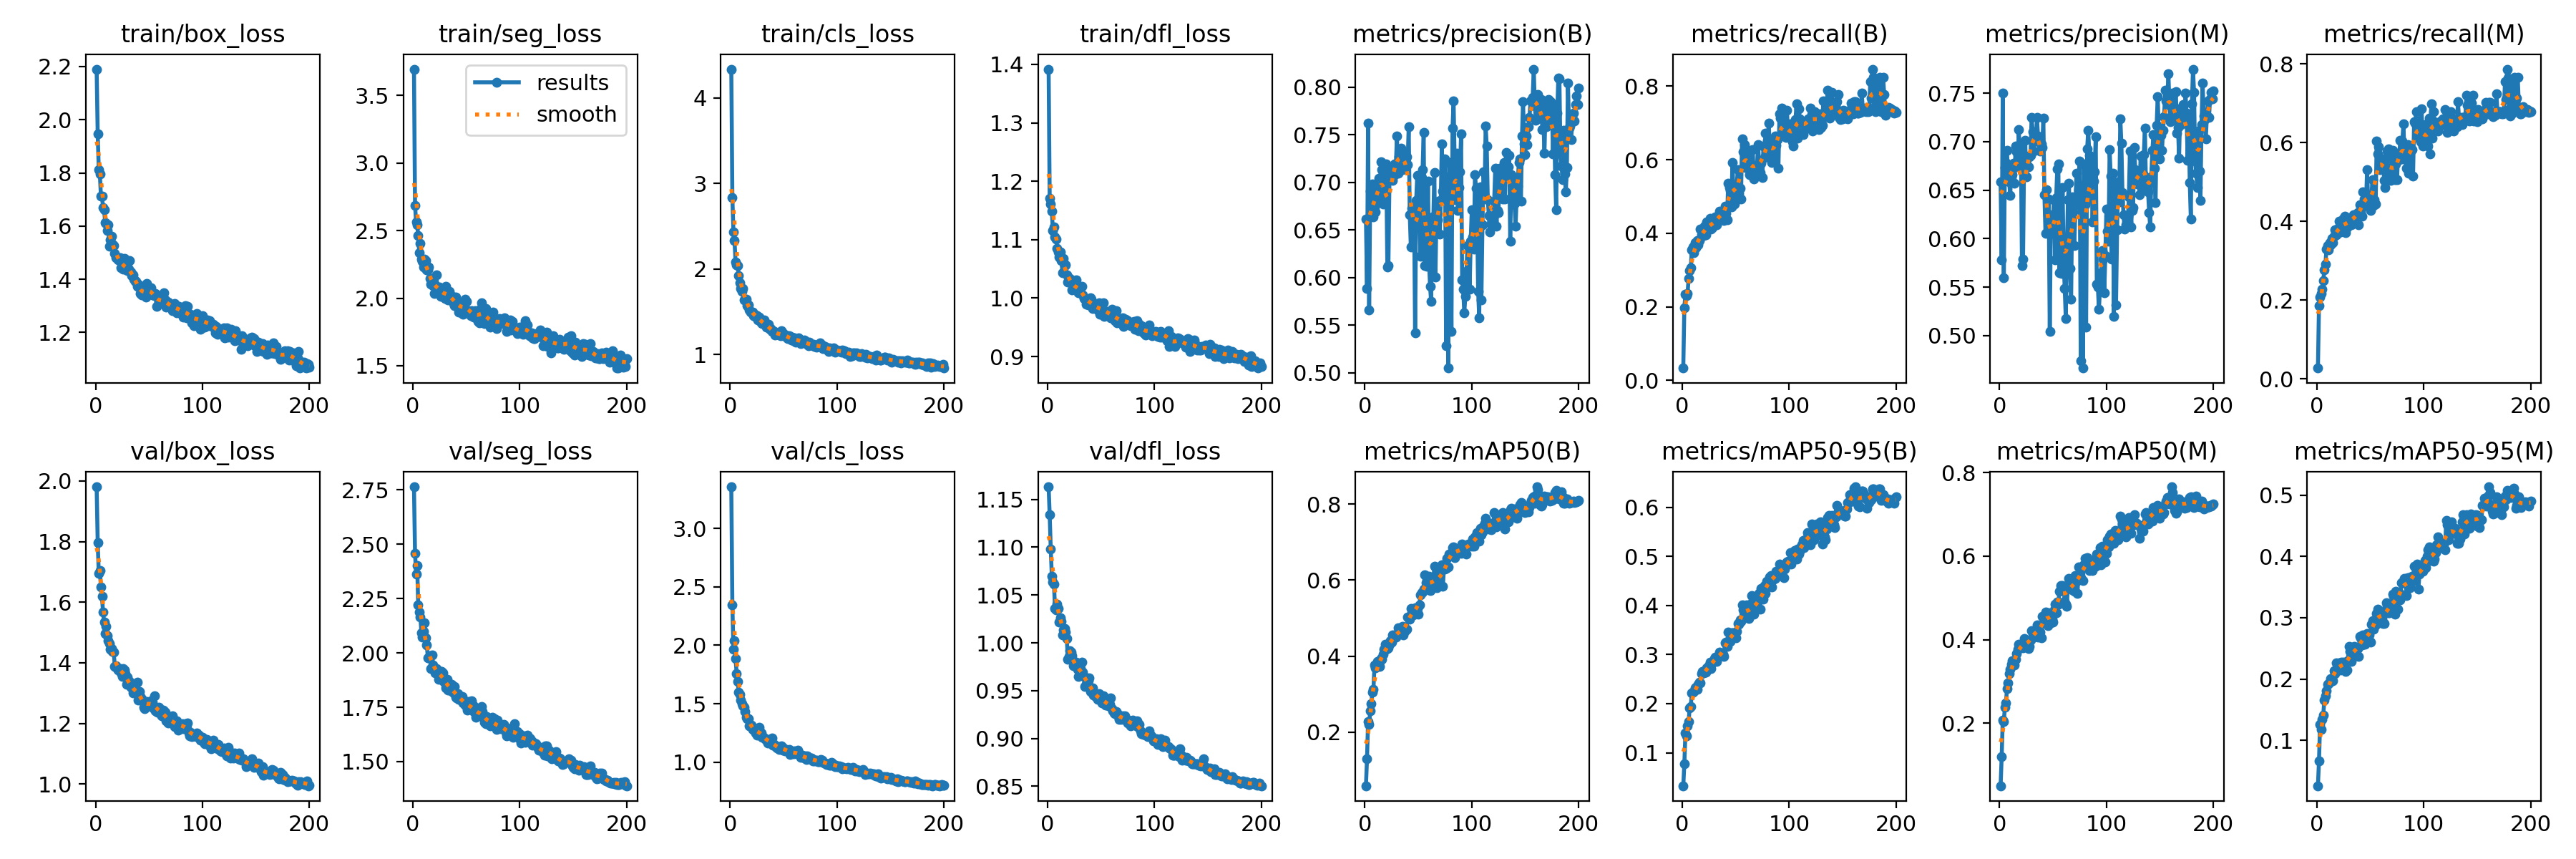

In [3]:
Image('./yolov8-segm-fine-tuning/200_epochs-2/results.png')

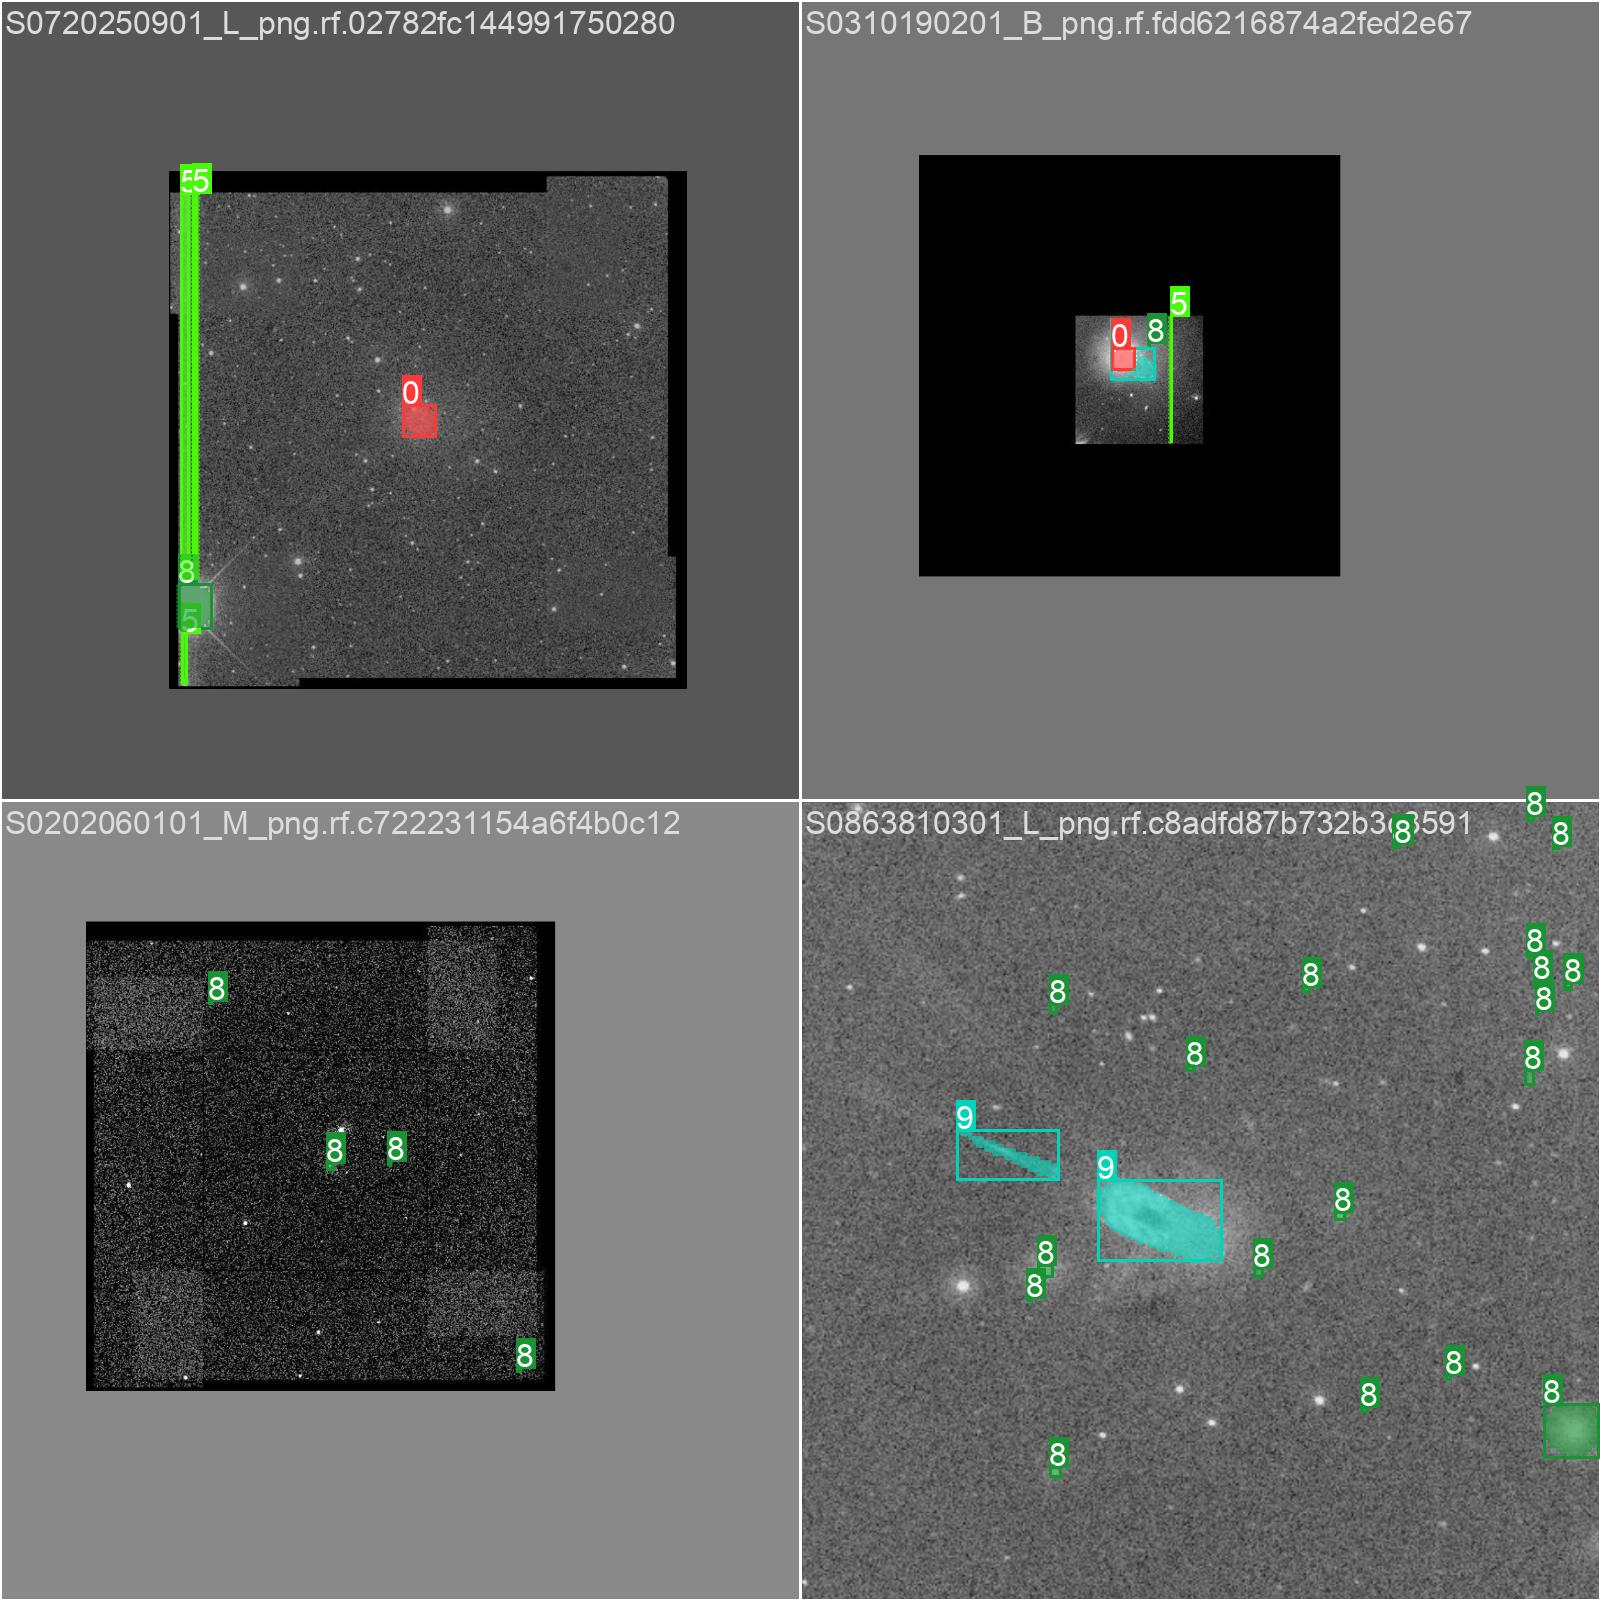

In [5]:
Image(filename='./yolov8-segm-fine-tuning/200_epochs-2/train_batch17670.jpg', width=900)

**Run inference**

You can load the best model or the latest.

In [104]:
my_new_model = YOLO('./yolov8-segm-fine-tuning/200_epochs-2/weights/best.pt')

Load an image and perform inference (segmentation).

In [105]:
new_image = '../XMM_OM_dataset/zscaled_512_stretched/S0005010301_L.png'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold


image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0005010301_L.png: 800x800 4 read-out-streaks, 1 smoke-ring, 8 stars, 2 star-loops, 6.3ms
Speed: 3.2ms preprocess, 6.3ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)


The results are stored in a variable 'new_results'. Since we only have one image for segmentation, we will only have one set of results. Therefore, let us work with that one result.

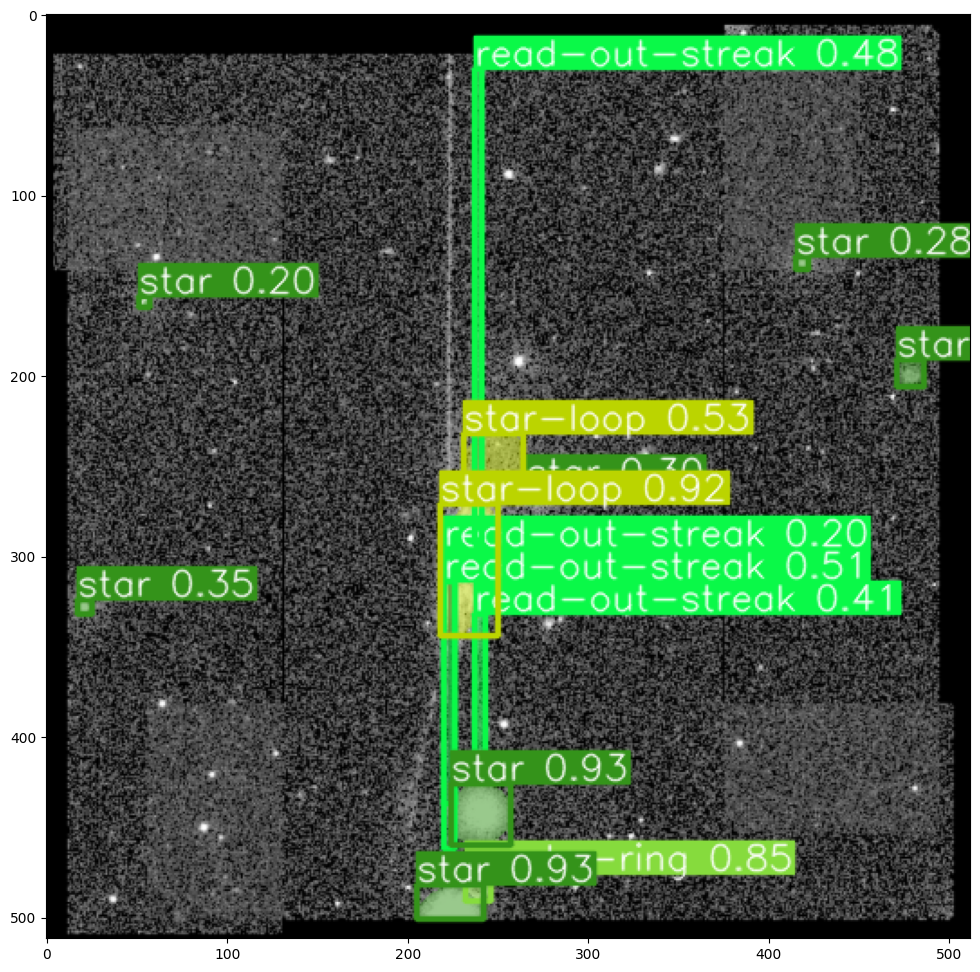

In [27]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

**Extracting bounding boxes and segmented masks from the result**

In [35]:
new_result = new_results[0]

In [41]:
len(new_result)

14

**Extracting bounding polygons** <p>
Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels)

In [37]:
new_result.masks.xyn

[array([[      0.455,       0.835],
        [    0.45375,     0.83625],
        [     0.4525,     0.83625],
        [     0.4475,     0.84125],
        [    0.44625,     0.84125],
        [    0.44125,     0.84625],
        [    0.44125,      0.8475],
        [       0.44,     0.84875],
        [       0.44,     0.88125],
        [    0.44125,      0.8825],
        [    0.44125,     0.88375],
        [     0.4425,       0.885],
        [     0.4425,     0.88625],
        [      0.445,     0.88875],
        [      0.445,        0.89],
        [     0.4475,      0.8925],
        [    0.44875,      0.8925],
        [       0.45,     0.89375],
        [     0.4525,     0.89375],
        [     0.4575,     0.89875],
        [     0.4775,     0.89875],
        [    0.48125,       0.895],
        [     0.4825,       0.895],
        [    0.48375,     0.89375],
        [      0.485,     0.89375],
        [    0.48625,      0.8925],
        [     0.4875,      0.8925],
        [    0.49625,     0.

**Extracting segmented masks**

In [51]:
extracted_masks = new_result.masks.data

In [52]:
extracted_masks.shape

torch.Size([14, 800, 800])

In [54]:
masks_array = extracted_masks.cpu().numpy()
print(len(masks_array))

14


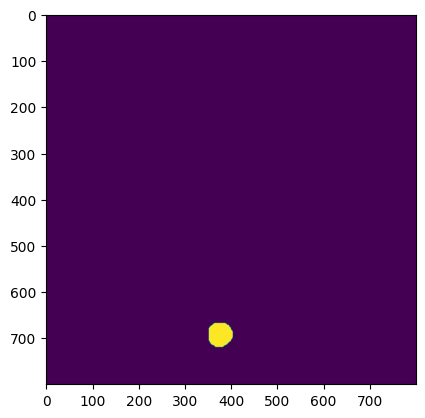

In [56]:
plt.imshow(masks_array[0])

**Extracting labels for each class**

In [57]:
class_names = new_result.names.values()
class_names

dict_values(['central-ring', 'cluster', 'galaxy', 'nebula', 'other', 'read-out-streak', 'scattered-light-outside-FOV', 'smoke-ring', 'star', 'star-loop'])

In [58]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

In [59]:
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")

Class Name: central-ring, Number of Masks: 0
Class Name: cluster, Number of Masks: 0
Class Name: galaxy, Number of Masks: 0
Class Name: nebula, Number of Masks: 0
Class Name: other, Number of Masks: 0
Class Name: read-out-streak, Number of Masks: 4
Class Name: scattered-light-outside-FOV, Number of Masks: 0
Class Name: smoke-ring, Number of Masks: 1
Class Name: star, Number of Masks: 7
Class Name: star-loop, Number of Masks: 2


**Extracting masks for a specific class**

In [65]:
star_loop_masks = masks_by_class['star-loop']

In [66]:
# Extract the original image
orig_img = new_result.orig_img

In [67]:
orig_img.shape

(512, 512, 3)

In [90]:
len(masks_array)

14

In [96]:
import cv2
import numpy as np

In [98]:
# usually, the masks have different size than the original image size
resized_masks = []
for mask in masks_array:
    resized_masks.append(cv2.resize(mask, orig_img.shape[:2], interpolation=cv2.INTER_LINEAR))

In [100]:
resized_masks[0].shape

(512, 512)

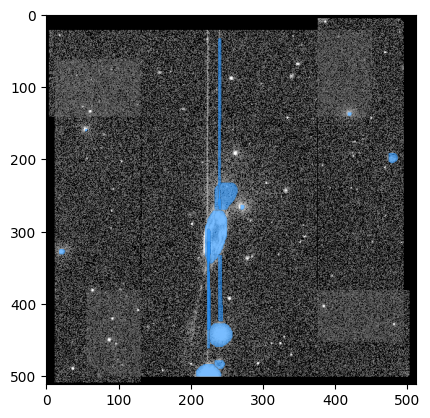

In [103]:
plt.imshow(orig_img)
show_masks(resized_masks, plt.gca())
plt.savefig('./plots/yolov8-seg-infer.png')
plt.show()

**Calculating region properties for all objects and saving to a csv file.**

In [84]:
import pandas as pd
from skimage.measure import regionprops

# Initialize a list to store the properties
props_list = []

# Iterate through all classes
for class_name, masks in masks_by_class.items():
    # Iterate through the masks for this class
    for mask in masks:
        # Convert the mask to an integer type if it's not already
        mask = mask.astype(int)

        # Apply regionprops to the mask
        props = regionprops(mask)

        # Extract the properties you want (e.g., area, perimeter) and add them to the list
        for prop in props:
            area = prop.area
            perimeter = prop.perimeter
            # Add other properties as needed

            # Append the properties and class name to the list
            props_list.append({'Class Name': class_name, 'Area': area, 'Perimeter': perimeter})

# Convert the list of dictionaries to a DataFrame
props_df = pd.DataFrame(props_list)

# Now props_df contains the properties and class names for all regions

# Save the DataFrame to a CSV file
props_df.to_csv('./plots/regionprop.csv', index=False)

In [85]:
props_df

,Class Name,Area,Perimeter
0,read-out-streak,1658.0,476.870058
1,read-out-streak,2615.0,756.284271
2,read-out-streak,1390.0,304.727922
3,read-out-streak,1636.0,448.970563
4,smoke-ring,387.0,72.284271
5,star,2248.0,174.124892
6,star,1272.0,144.669048
7,star,419.0,74.627417
8,star,152.0,43.899495
9,star,100.0,35.313708


**Plotting results**

In [86]:
import seaborn as sns

**Swarm plot**

/opt/conda/envs/env_py311/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


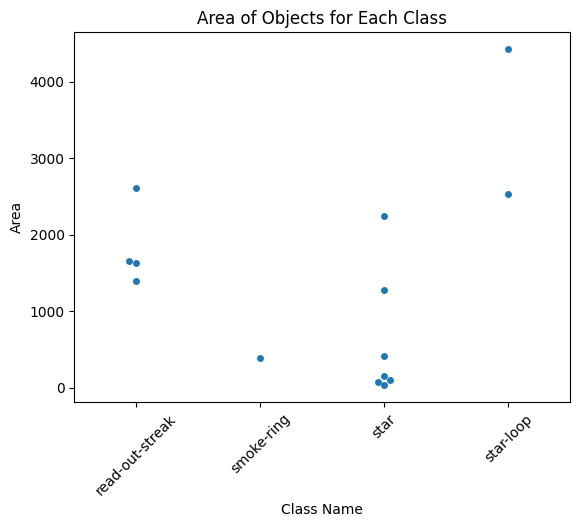

In [87]:
# Create the swarm plot with Seaborn
sns.swarmplot(x='Class Name', y='Area', data=props_df)

# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Box Plot**

/opt/conda/envs/env_py311/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


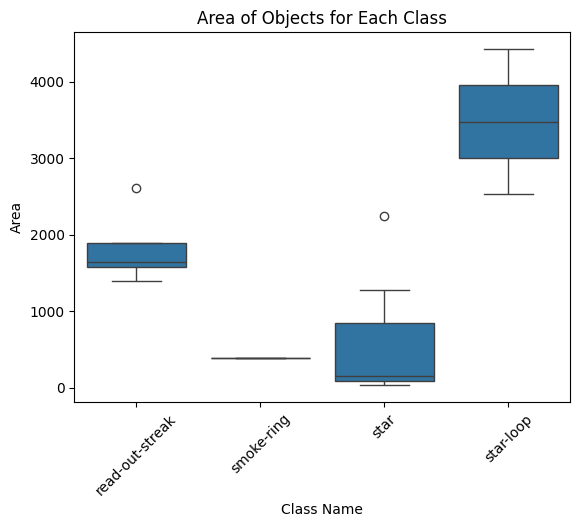

In [88]:
sns.boxplot(x='Class Name', y='Area', data=props_df)
# Add labels and a title
plt.xlabel('Class Name')
plt.ylabel('Area')
plt.title('Area of Objects for Each Class')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Export model to ONNX for deployment.**

In [89]:
# Export the model
my_new_model.export(format='onnx', imgsz=orig_img.shape[:2])

Ultralytics YOLOv8.1.14 🚀 Python-3.11.7 torch-2.1.2+cu121 CPU (AMD EPYC 7742 64-Core Processor)

PyTorch: starting from 'yolov8-segm-fine-tuning/200_epochs-2/weights/last.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) ((1, 46, 13125), (1, 32, 200, 200)) (6.5 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.8s, saved as 'yolov8-segm-fine-tuning/200_epochs-2/weights/last.onnx' (12.7 MB)

Export complete (3.3s)
Results saved to /workspace/raid/OM_DeepLearning/XMM_OM_code_git/yolov8-segm-fine-tuning/200_epochs-2/weights
Predict:         yolo predict task=segment model=yolov8-segm-fine-tuning/200_epochs-2/weights/last.onnx imgsz=800  
Validate:        yolo val task=segment model=yolov8-segm-fine-tuning/200_epochs-2/weights/last.onnx imgsz=800 data=./-xmm_om_images_v4-contrast-512-5-7/data.yaml  
Visualize:       https://netron.app


'yolov8-segm-fine-tuning/200_epochs-2/weights/last.onnx'